## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

## **Równanie ruchu wahadła matematycznego**

Ruch wahadła matematycznego, czyli ruch punktu materialnego zawieszonego na nieważkiej nici w polu grawitacyjnym można zapisać za pomocą równania II rzędu postaci:

> ### $\frac{d^2 {\bf \alpha}(t)}{dt^2} = \frac{{\bf g}}{l} \sin{\alpha(t)},$ 

gdzie $\alpha$ to kąt wychylenia od pozycji spoczynkowej wahadła. Korzystając z podstawienia:

> ### $\omega = \frac{d\alpha}{dt}$,

powyższe równanie można zapisać w postaci dwóch równań I rzędu:

> ### $ \frac{d\alpha(t)}{dt} =  \omega(t)$.

> ### $ \frac{d{\bf \omega}(t)}{dt} = - \frac{{\bf g}}{l} \sin{ \alpha(t)}$

Numerycznie rozwiązanie tego układu równań można wyznaczyć metodą Eulera:

> ### $ \omega (n+1) = {\omega_t} - \frac{{\bf g}}{l} \sin{ \alpha(t)} \cdot h$ 

> ### $ {\alpha_{n+1}} = {\alpha_n } +  \omega_n \cdot h$.

Energia kinetyczna wahadła jest dana wzorem:

> ### $E_k  = \frac{m (r\omega)^2}{2}$,

natomiast energia potencjalna:

> ### $E_p  = mgh$.

### Przybliżenie małych kątów: $\sin \alpha \approx \alpha$

Proste rozwiązanie analityczne dostaniemy gdy przyjmiemy założenie: $\sin{\alpha}, \approx \alpha$, wówczas:

> $\alpha(t) = \alpha_0 \cos(t \sqrt{\frac{g}{l}} + \varphi)$,

gdzie $\varphi$ to początkowa faza drgań, $\alpha_0$ to amplituda drgań



 # **Zadanie 0** 

 Uzupełnij funkcję *odeEuler2* tak, aby implementowała rozwiązywanie powyższego układu równań różniczkowych metodą Eulera. Dla uproszczenia przyjmij $g = l = 1$, m = 1.


In [29]:
import matplotlib.pyplot as plt
import numpy as np

def pendulumEuler(a0, w0, t):
    '''
    a0 : alpha_zero - odchylenie początkowe, jednostka: radiany
    w0 : omega_zer0 - początkowa prędkość kątowa, jednostka: radiany na sekundę
    t  : jednowymiarowy wektor puntków czasowych, tablica numpy
    '''
    a = np.zeros(len(t))
    w = np.zeros(len(t))
    a[0] = a0
    w[0] = w0
    for n in range(0,len(t)-1):
        h  = t[n+1] - t[n]
        w[n+1] = w[n] - (np.sin(a[n]) * h)
        a[n+1] = a[n] + (w[n] * h)
    return a, w



 # **Zadanie 1** 

### **Ruch wahadła matematycznego w polu grawitacyjnym**

Zbadaj stabilność rozwiązania problemu wahadła matematycznego metodą Eulera w zależnośći od:

> - liczby kroków czasowych n
> - amplitudy wahań $\alpha_0$
> - długości rozpatrywanego przedziału czasowego

Rozpatrz różnice pomiędzy ścisłym, a numerycznym rozwiązaniem dla:

> - funkcji wychylenia w czasie
> - prędkości kątowej w funkcj wychylenia
> - zmiany energii kinetycznej w czasie

Text(0, 0.5, 'wychylenie')

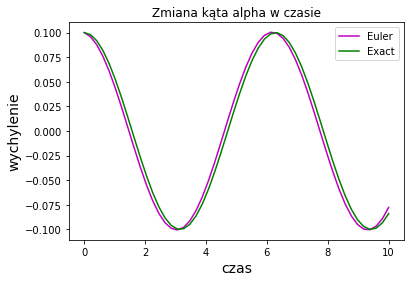

In [26]:
a = 0
b = 10

a0 = 0.1
w0 = 0

n1 = 50
n2 = 40

t1 = np.linspace(a,b,n1)
t2 = np.linspace(a,b,n2)

a1, w1  = pendulumEuler(a0, w0, t1)
a2, w2  = pendulumEuler(a0, w0, t2)

plt.figure(1)
plt.title('Zmiana kąta alpha w czasie')
plt.plot(t1, a1,'m',label = "Euler")
plt.plot(t1, a0 * np.cos(t1),'g',label='Exact')

plt.legend()
plt.xlabel('czas', fontsize =14)
plt.ylabel('wychylenie', fontsize =14)

Text(0, 0.5, 'prędkość kątowa')

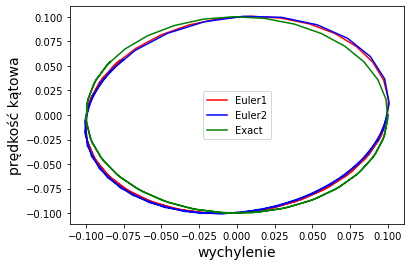

In [27]:
# Narysuj wykres wychylenia w funkcji prędkości kątowej

plt.figure(1)

plt.plot(a1, w1,'r',label = "Euler1")
plt.plot(a2, w2,'b',label = "Euler2")

# rozwiązanie analityczne dla małych kątów
plt.plot(a0 * np.cos(t1), -a0 *np.sin(t1),'g',label = "Exact")

plt.legend()
plt.xlabel('wychylenie', fontsize =14)
plt.ylabel('prędkość kątowa', fontsize =14)

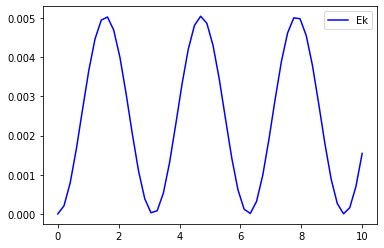

In [28]:
# Narysuj wykres energii energii kinetycznej w czasie

plt.plot(t1, w1**2/2, 'b', label = 'Ek')

plt.legend()

 # **Zadanie 2** 

### Popraw stabilność metody Eulera wykorzystująć $\omega_{n+1}$ do obliczenia $\alpha_n$. Porównaj otrzymane przybliżenie z wynikami z Zadania 1.


In [31]:
def pendulumEuler2(a0, w0, t):
    '''
    a0 : alpha_zero - odchylenie początkowe, jednostka: radiany
    w0 : omega_zer0 - początkowa prędkość kątowa, jednostka: radiany na sekundę
    t  : jednowymiarowy wektor puntków czasowych, tablica numpy
    '''
    a = np.zeros(len(t))
    w = np.zeros(len(t))
    a[0] = a0
    w[0] = w0
    for n in range(0,len(t)-1):
        h  = t[n+1] - t[n]
        w[n+1] = w[n] - (np.sin(a[n]) * h)
        a[n+1] = a[n] + (w[n + 1] * h) 
    return a, w    

Text(0, 0.5, 'wychylenie')

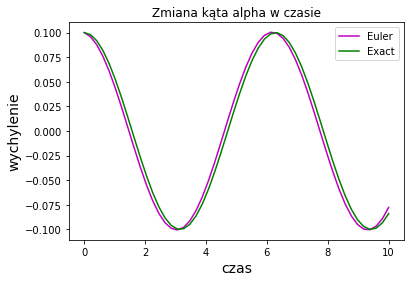

In [36]:
a = 0
b = 10

a0 = 0.1
w0 = 0

n1 = 50
n2 = 40

t1 = np.linspace(a,b,n1)
t2 = np.linspace(a,b,n2)

a1, w1  = pendulumEuler2(a0, w0, t1)
a2, w2  = pendulumEuler2(a0, w0, t2)

plt.figure(1)
plt.title('Zmiana kąta alpha w czasie')
plt.plot(t1, a1,'m',label = "Euler")
plt.plot(t1, a0 * np.cos(t1),'g',label='Exact')

plt.legend()
plt.xlabel('czas', fontsize =14)
plt.ylabel('wychylenie', fontsize =14)

Text(0, 0.5, 'prędkość kątowa')

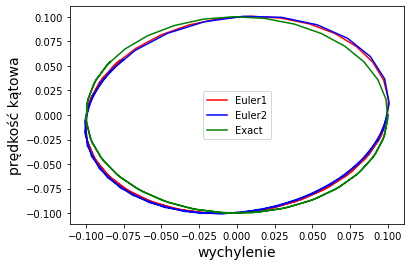

In [37]:
# Narysuj wykres wychylenia w funkcji prędkości kątowej

plt.figure(1)

plt.plot(a1, w1,'r',label = "Euler1")
plt.plot(a2, w2,'b',label = "Euler2")

# rozwiązanie analityczne dla małych kątów
plt.plot(a0 * np.cos(t1), -a0 *np.sin(t1),'g',label = "Exact")

plt.legend()
plt.xlabel('wychylenie', fontsize =14)
plt.ylabel('prędkość kątowa', fontsize =14)

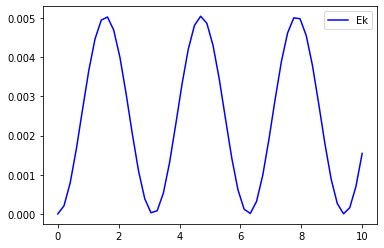

In [38]:
# Narysuj wykres energii energii kinetycznej w czasie

plt.plot(t1, w1**2/2, 'b', label = 'Ek')

plt.legend()